In [1]:
library(ggplot2)
library(sqldf)
library(ggmap)
library(dplyr)
library(data.table)

Loading required package: gsubfn
Loading required package: proto
Could not load tcltk.  Will use slower R code instead.
Loading required package: RSQLite

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

------------------------------------------------------------------------------
data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!
------------------------------------------------------------------------------

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last



In [2]:
file=read.csv("/home/naina/Downloads/June 10-July 12, 2015 - Gaming, Jobs and Broadband/June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv")

In [3]:
head(file)

psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,⋯,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,⋯,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,⋯,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,⋯,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,⋯,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,⋯,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,⋯,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737


<b><h3>How do males and females living in excellent community rate their economy?</h3></b>



<h4>Hypothesis:</h4> Excellent economy is an ideal situation which is rare to occur in any community. So most of the people irrespective of the sex would believe in good economy.

In [4]:
data=sqldf('SELECT count(*) No_of_people,sex,q1,q3 as Economy_rating from file where q1!="NA" AND q1!="2" AND q1!="3" AND q1!="4" AND q1!="8" AND q1!="9" AND q3!="8" AND q3!="9" AND q3!="4" group by sex,q3 ')
data

Warning message:
“Quoted identifiers should have class SQL, use DBI::SQL() if the caller performs the quoting.”

No_of_people,sex,q1,Economy_rating
66,1,1,1
235,1,1,2
78,1,1,3
80,2,1,1
234,2,1,2
81,2,1,3


In [5]:
data$Economy_rating=factor(data$Economy_rating,levels=c(1,2,3),labels=c("Excellent","Good","Only fair"))
data$sex=factor(data$sex,levels=c(1,2),labels=c("Male","Female"))

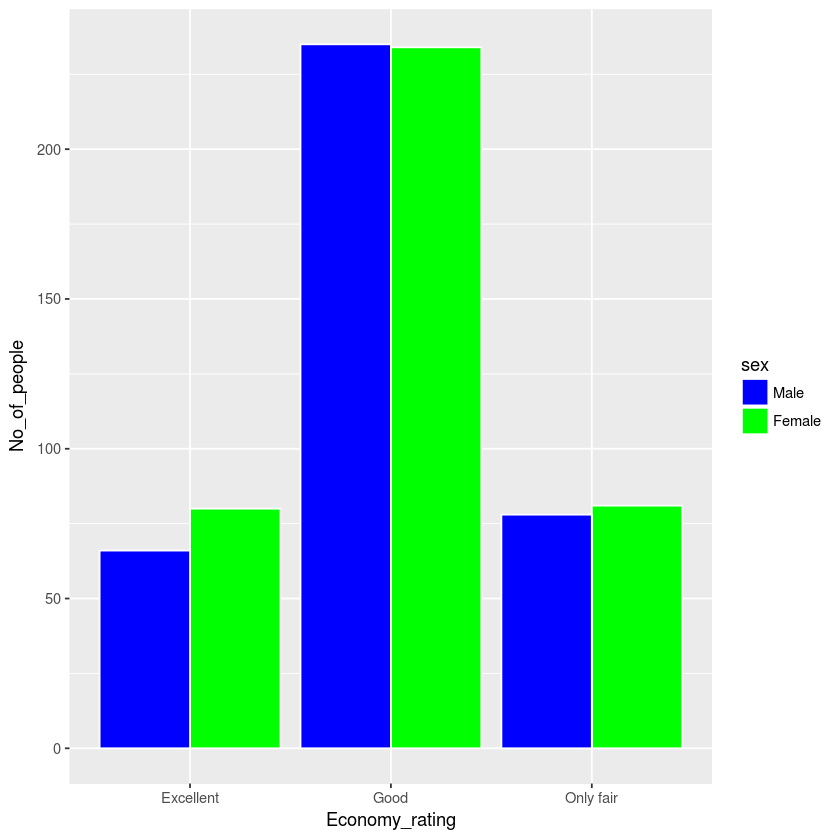

In [6]:
ggplot(data=data, aes(x=Economy_rating, y=No_of_people, fill=sex)) +
    geom_bar(stat="identity", position=position_dodge(), colour="white") +
    scale_fill_manual(values=c("blue", "green"))

<h4> Inference :</h4> Most people of both the sexes living in excellent community rate their economy as good. 

<b><h3>How does various age-group people who use an online dating app feel about it being a good way to meet people?</h3></b>

<h4>Hypothesis :</h4> Most of the people using dating app are of age between 25 and 55 so those who agree with it to be a good way to meet people would be lying in the same range.

In [5]:
q2=sqldf('SELECT age,date3a, date4a as Good_way_of_meeting_people,count(*) as Count from file where date3a!="NA" AND date4a!="NA" AND date4a!="8" AND date4a!="9" AND date3a!="2" AND date3a!="8" AND date3a!="9" group by age,date4a order by 4 desc')

In [6]:
q2

age,date3a,Good_way_of_meeting_people,Count
26,1,1,18
55,1,1,18
24,1,1,17
53,1,1,16
25,1,1,14
32,1,1,14
57,1,1,14
62,1,1,14
19,1,1,13
22,1,1,13


In [7]:
q2$Good_way_of_meeting_people=factor(q2$Good_way_of_meeting_people,levels=c(1,2),labels=c("Agree","Disagree"))

`geom_smooth()` using method = 'loess'


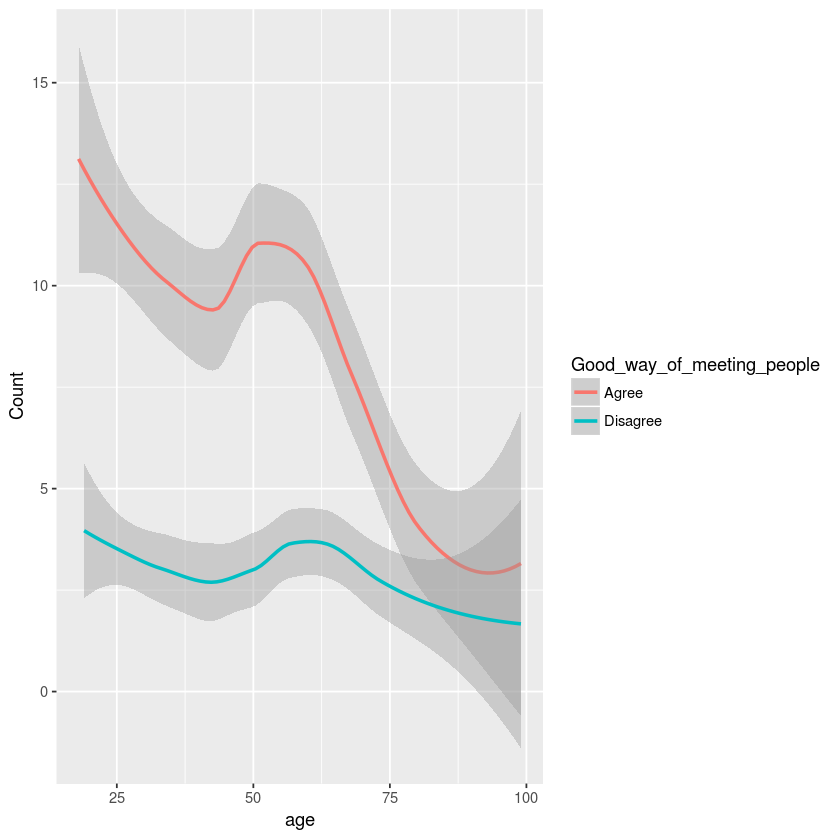

In [8]:
qplot(age,Count ,colour=Good_way_of_meeting_people,data=q2, geom=c("smooth"))

<h4>Inference :</h4> People of age less than 55 agree more with online dating app to be a good way to meet people.

<b><h3>What do males and females think about video games portraying women poorly?</h3></b>

<h4>Hypothesis :</h4> This is a question which provokes gender bias and so most people would answer it moderately avoiding any extreme option.

In [18]:
q3=sqldf('SELECT count(*) as count,sex,game2c as Video_Games_Portray_Women_Poorly from file where game2c!="9" AND game2c!="8" group by sex,game2c')

In [19]:
q3

count,sex,Video_Games_Portray_Women_Poorly
129,1,1
250,1,2
190,1,3
141,2,1
255,2,2
163,2,3


In [20]:
q3$sex=factor(q3$sex,levels=c(1,2),labels=c("Male","Female"))
q3$Video_Games_Portray_Women_Poorly=factor(q3$Video_Games_Portray_Women_Poorly,levels=c(1,2,3),labels=c("True for most games","True for some games","Not true for most games"))

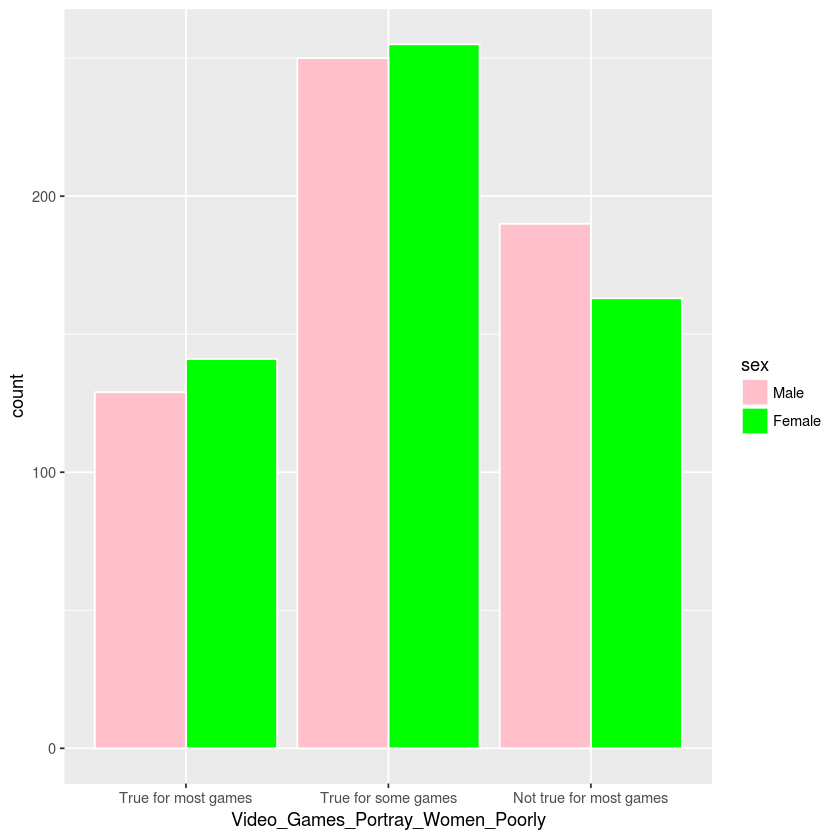

In [21]:
ggplot(data=q3, aes(x=Video_Games_Portray_Women_Poorly, y=count, fill=sex)) +
    geom_bar(stat="identity", position=position_dodge(), colour="white") +
    scale_fill_manual(values=c("pink", "green"))

<h4>Inference :</h4> Both males and females believe that there are some games that portray women poorly.

<b><h3>How many Full-time employees working at different places think their work involves manual and physical labor?</h3></b>

<h4>Hypothesis :</h4> Everyone thinks that their work is more laborious than others but since a large corporation will have more people and so the employees thinking their work to involve manual and physical labor would be more in these.

In [10]:
q4=sqldf('SELECT emplnw,emptype1 as WorkPlace,emptype2,count(*)as No_Of_Employees from file where emplnw="1" AND emptype2="1" AND emptype1!="4" AND emptype1!="5" AND emptype1!="7" AND emptype1!="8" AND emptype1!="98" AND emptype1!="99" group by emptype1,emptype2')

In [11]:
q4

emplnw,WorkPlace,emptype2,No_Of_Employees
1,1,1,107
1,2,1,46
1,3,1,92
1,6,1,13


In [12]:
q4$WorkPlace=factor(q4$WorkPlace,levels=c(1,2,3,6),labels=c("Large corporation","Medium-sized company","Small business","NGO"))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

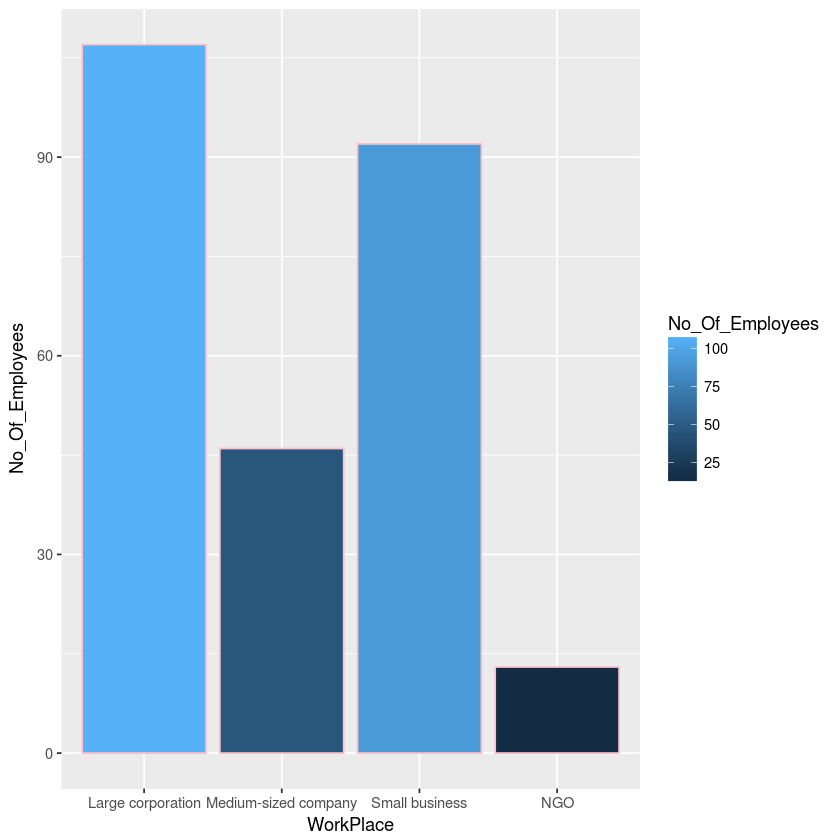

In [13]:
ggplot(data=q4, aes(x=WorkPlace, y=No_Of_Employees,fill=No_Of_Employees)) +
    geom_histogram(stat="identity", position=position_dodge(), col="pink")

<h4>Inference :</h4> The number of Full-time employees working in large corporation who think their work invloves physical and manual labor is more than those working at other places.

<b><h3>What are the political views of the males born in the US?</h3></b>

<h4>Hypothesis :</h4> US is a democratic nation so most males here would be of moderate views.

In [11]:
q5=sqldf('SELECT sex,birth_hisp as US_born,ideo as Ideologies,count(*)as count from file where sex="1" AND birth_hisp="1" AND ideo!="8" AND ideo!="9" group by ideo,birth_hisp')

In [12]:
q5

sex,US_born,Ideologies,count
1,1,1,4
1,1,2,9
1,1,3,19
1,1,4,12
1,1,5,9


In [13]:
q5$Ideologies=factor(q5$Ideologies,levels=c(1,2,3,4,5),labels=c("Very conservative","Conservative","Moderate","Liberal","Very Liberal"))

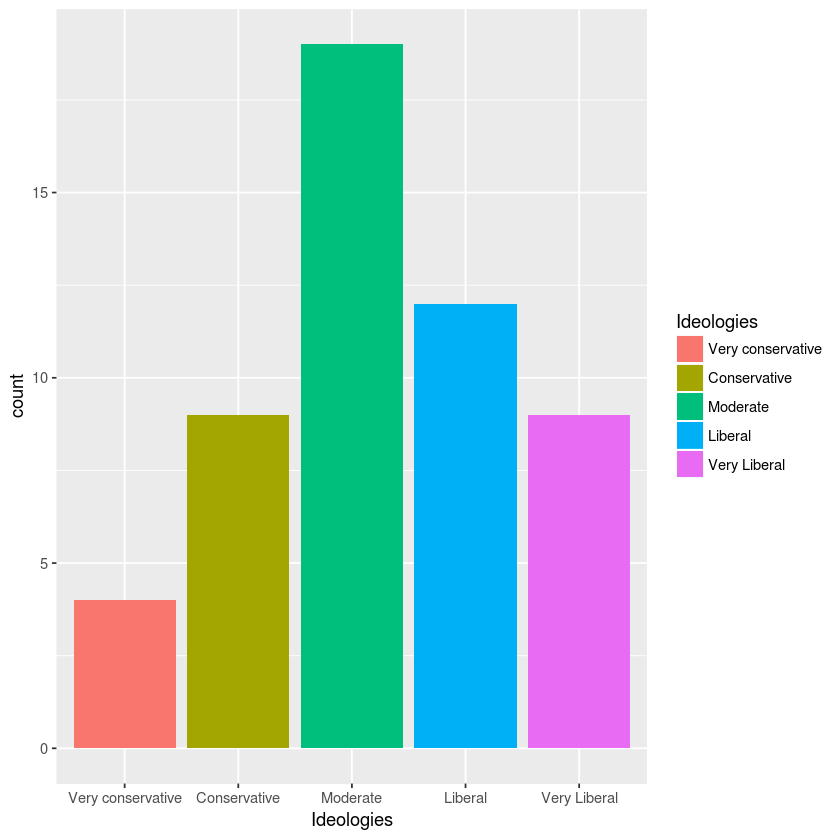

In [14]:
ggplot(data=q5, aes(x=Ideologies, y=count, fill=Ideologies)) +
    geom_bar(stat="identity", position=position_dodge())

<h4>Inference :</h4> Most males born in US have moderate ideologies.